# Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation
#### Jun He(8903073) due:2024-10-13

## Instructions
### **The dataset**: Scikit-Learn Diabetes dataset. Scikit-Learn provides toy datasets ([list](https://scikit-learn.org/stable/datasets/toy_dataset.html)). Here we will use the diabetes dataset ([description](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)). Make sure to go over this description, before start exploring the data.
### The data can be loaded into a notebook by the code below. See the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) to read about the 
### `load_diabetes` method and its optional arguments: return_X_y, as_frame and scaled. you can add them if needed:
### from sklearn import datasets
### datasets.load_diabetes()
### **Objective**: build a model that can best predict the risk of diabetes progression. This will be used as a screening tool to help physicians with identifying patients at risk. The models that we look into are:
1. Univariate polynomial regression models
2. Multivariate Polynomial models
3. Decision Trees
4. kNNs
### In this lab we will evaluate the models using [R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination), Mean Absolute Percentage Error ([MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)) and Mean Absolute Error ([MAE](https://en.wikipedia.org/wiki/Mean_absolute_error)) metrics. To do that we will run cross validation.
### **Writing a good ML Report**: Notice to follow a [good notebook structure](https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/notebook_structure/notebook_structure.ipynb), and focus on readability and clarity of the code, insights and conclusions.
### The steps to be taken:


 ## Part 1 (5 points)
 ### 1. Get the data.

In [115]:
# according to introduction load the data
from sklearn import datasets
diabetes_results = datasets.load_diabetes()


In [116]:
# for later using, convert results to dataframe structure and see the dataset structure
import pandas as pd
x = pd.DataFrame(diabetes_results.data, columns = diabetes_results.feature_names)
x['target'] = diabetes_results.target
# get y value
y = pd.Series(diabetes_results.target, name= 'disease_progression')
print(x.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


### 2. Frame the Problem. Notice that the dependent variable of diabetes progression, namely "disease progression one year after baseline".

* This report mainly is to predict diabetes progression one year after baseline based on different features from the dataset.
* There is dependent variable: y.

### 3. EDA - Describe the data, explore it, and provide insights about it. This should include at least: statistics, scatter plots histograms, a correlation matrix, and concise and relevant insights (4 point).

### Display x and y summary data.

In [117]:
# 1.Statistics: about x and y summary data show
print(x.describe())
print(y.describe())


                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

### For scatter only show the BMI vs target variable, because BMI is the main metric influces the disease progression.

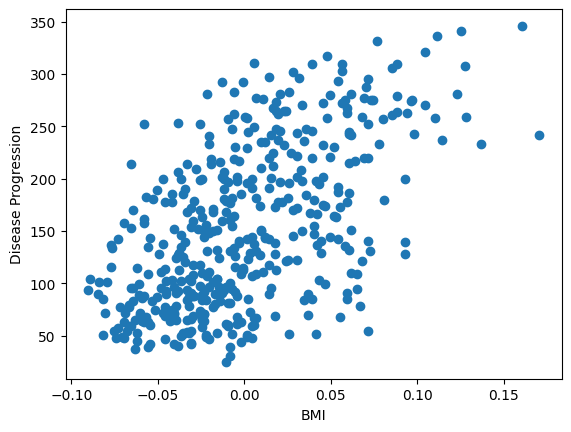

In [118]:
# 2.Scatter plots of BMI ^ progression 
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(x['bmi'], y)
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.show()


### Histograms indicates each feature's distributions

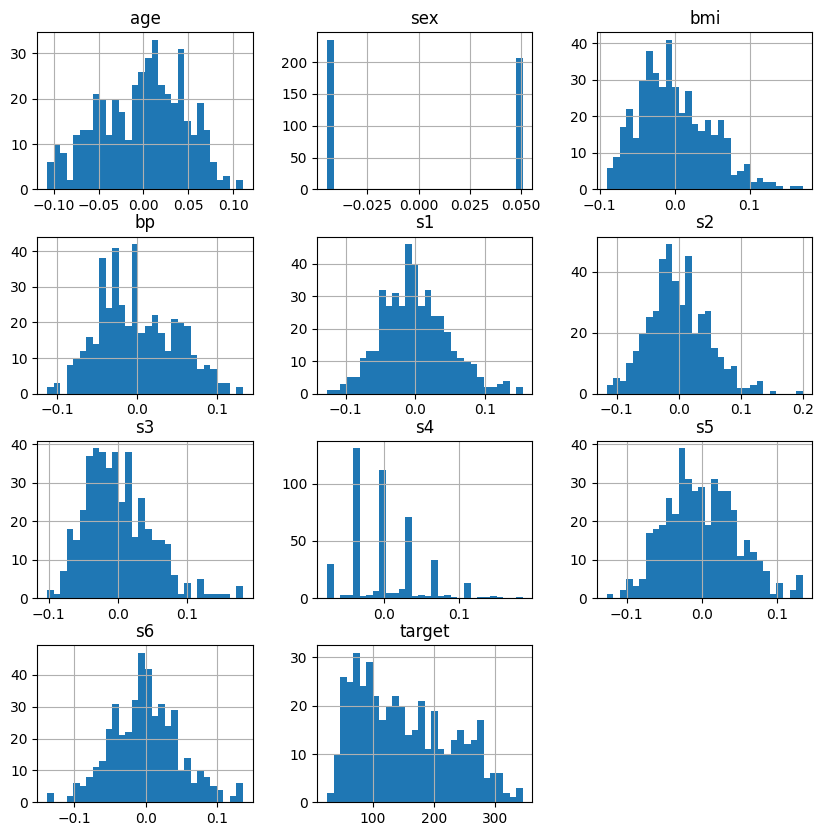

In [119]:
# 3. histograms
x.hist(bins=30, figsize=(10, 10))
plt.show()

### Correlation matrix to show the relationships from various features.

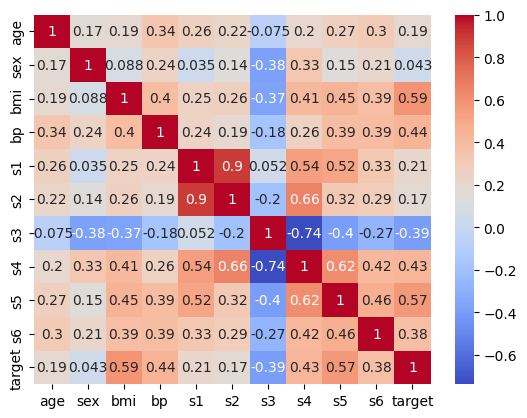

In [120]:
# 4. Correlation Matrix
# correlation
corr_matrix = x.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### 4. Clean the data if needed, and explain your reasoning for your reader (1 point)

In [121]:
## use StandardScaler() to standardize the data which is adjust mean to 0,and standard deviation to 1
## Make the data format uniform to avoid extreme data affecting the results

from sklearn.preprocessing import StandardScaler
standard_dt = StandardScaler()
x_transform = standard_dt.fit_transform(x)


### 5. Split the dataset to a train and validation set (85%), and test set (15%). The train and validation set will be used in cross-validation.

In [122]:
# import the package sklearn.model_selection for split train and test
from sklearn.model_selection import train_test_split

# x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
x_train, x_temp, y_train, y_temp = train_test_split(x_transform, y, test_size=0.15, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.15, random_state=42)

## Part 2 (10 points)

### 6. Perform cross-validation, use 5 folds. Consider using the `cross_validate` function as it provides a list of scoring functions as an input. Models: a univariate polynomial regression on the BMI feature versus the "disease progression one year after baseline" - from degree 0 to 5 (6 models) (1.5 point)

In [123]:
import numpy as np
from typing import List
def create_polynomial_models(X: np.ndarray, y: np.ndarray, degrees: List[int]) -> dict[int, np.poly1d]:
    """
    Creates polynomial models for the given degrees and fits them to the given data.

    Args
        X: The x values of the data.
        y: The y values of the data.
        degrees: A list of polynomial degrees to try.

    Returns:
        A dictionary of polynomial models, with the polynomial degree as the key.
    """


    models = {}
    for degree in degrees:
        model = Pipeline([('polynomial', PolynomialFeatures(degree=degree)),
                          ('linear', LinearRegression())])
        model.fit(X, y)
        models[degree] = model
    return models

In [124]:
# With the function that we've just defined, let's create 6 polynomial models, from degree 0 (constant) and up to a degree of 5:

In [125]:
# step1: import packages what i need
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

X_bmi_train = x_train[:, 2].reshape(-1, 1) 
X_bmi_val = x_val[:, 2].reshape(-1, 1)
X_bmi_test = x_test[:, 2].reshape(-1, 1)

# step2 declare variables 6 models
degrees = [0, 1, 2, 3, 4, 5]
results = []
# step3 for loop each model
for degree in degrees:
    # x_train_val, x_test, y_train_val, y_test

    ply = PolynomialFeatures(degree)
    # get x ply train and value
    x_poly_train = ply.fit_transform(X_bmi_train)
    x_poly_val = ply.transform(X_bmi_val)

    # generate LinearRegression model
    model = LinearRegression().fit(x_poly_train, y_train)
    
    # get train and predict y value
    y_train_pred = model.predict(x_poly_train)
    y_val_pred = model.predict(x_poly_val)

    #get R-Squared
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # get MAE
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # get MAPE
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)

    # structure all the data
    results.append({
        'degree': degree,
        'train_r2': train_r2,
        'val_r2': val_r2,
        'train_mae': train_mae,
        'val_mae': val_mae,
        'train_mape': train_mape,
        'val_mape': val_mape
    })

print(results)



[{'degree': 0, 'train_r2': 0.0, 'val_r2': -0.0002009284671784517, 'train_mae': np.float64(66.17962666666666), 'val_mae': np.float64(61.09195238095238), 'train_mape': np.float64(0.628192941958706), 'val_mape': np.float64(0.5160710120744803)}, {'degree': 1, 'train_r2': 0.36481913899590623, 'val_r2': 0.20536252916984865, 'train_mae': np.float64(51.01379542259125), 'val_mae': np.float64(52.91256446535844), 'train_mape': np.float64(0.4727586276386887), 'val_mape': np.float64(0.4127349885588779)}, {'degree': 2, 'train_r2': 0.3652843389300766, 'val_r2': 0.19743915626666508, 'train_mae': np.float64(50.978088790571455), 'val_mae': np.float64(53.083193142611215), 'train_mape': np.float64(0.4724993903748464), 'val_mape': np.float64(0.4131605618215624)}, {'degree': 3, 'train_r2': 0.3653402477973886, 'val_r2': 0.2012784807416692, 'train_mae': np.float64(50.958788414190096), 'val_mae': np.float64(52.903921825018315), 'train_mape': np.float64(0.472091358538316), 'val_mape': np.float64(0.4121837122280

In [126]:
def plot_multiple_models(X, y, models):
    # Calculate the number of rows and columns for the subplots
    X_continuous = np.linspace(min(X), max(X), 100)
    n_plots = len(models)
    n_cols = int(np.ceil(np.sqrt(n_plots)))
    n_rows = int(np.ceil(n_plots / n_cols))
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6, 6))
    fig.tight_layout(pad=3.0)
    axs = axs.flatten()
    for i, (name, model) in enumerate(models.items()):
        axs[i].scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
        axs[i].plot(X_continuous, model.predict(X_continuous), label=f"Model={name}", linewidth=2)
        axs[i].set_xlabel("data")
        axs[i].set_ylabel("target")
        axs[i].set_title(f"Model={name}")
    plt.show()

### 7. Compare the models using the training and validation data. Construct a table summarizing the cross-validation results. Each model should have a separate row in the table. Have the mean and standard deviation for each model (calculated per model over all 5 folds). You should have 12 values per model (3 points):
    1. R-Squared
    2. Mean Absolute Error (MAE)
    3. MAPE

In [127]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error, r2_score
#Set up cross-validation, initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Lists to store results for each model
models_results = []
degrees = [0, 1, 2, 3, 4, 5]

# If X_bmi_train and y_train are DataFrames, reset the index to ensure KFold indexing works
X_bmi_train = pd.DataFrame(X_bmi_train).reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)

for d in degrees:
    # declare variables
    r2_scores = []
    mae_scores = []
    mape_scores = []

    # initial model
    poly = PolynomialFeatures(degree=d)
    model = LinearRegression()

    # Perform KFold cross-validation
    # This ensures that the indices align correctly with the KFold cross-validation splits.
    for train_index, val_index in kf.split(X_bmi_train):
        #In the loop where we split the data, I use .iloc[] for accessing rows in the DataFrame by index
        X_train_cv, X_val_cv = X_bmi_train.iloc[train_index], X_bmi_train.iloc[val_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
        # Create polynomial features
        X_poly_train = poly.fit_transform(X_train_cv)
        X_poly_val = poly.transform(X_val_cv)

        # Fit the model
        model.fit(X_poly_train, y_train_cv)

        # Predictions
        y_train_pred = model.predict(X_poly_train)
        y_val_pred = model.predict(X_poly_val)

        # Calculate metrics for the validation fold
        r2 = r2_score(y_val_cv, y_val_pred)
        mae = mean_absolute_error(y_val_cv, y_val_pred)
        mape = mean_absolute_percentage_error(y_val_cv, y_val_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        mape_scores.append(mape)

    # Store mean and standard deviation of each metric
    models_results.append({
        'degree': d,
        'mean_r2': np.mean(r2_scores), 
        'std_r2': np.std(r2_scores),
        'mean_mae': np.mean(mae_scores),
        'std_mae': np.std(mae_scores),
        'mean_mape': np.mean(mape_scores),
        'std_mape': np.std(mape_scores)
    })

# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(models_results)

# Display the results
print(results_df)

   degree   mean_r2    std_r2   mean_mae   std_mae  mean_mape  std_mape
0       0 -0.022258  0.024867  66.522489  3.555542   0.631324  0.075894
1       1  0.343814  0.067321  51.431085  1.933734   0.476001  0.065447
2       2  0.340567  0.068030  51.499640  1.749188   0.476659  0.064098
3       3  0.339495  0.068098  51.515001  1.780494   0.476157  0.064211
4       4  0.335460  0.062899  51.760918  2.331633   0.474835  0.064599
5       5  0.335957  0.067528  51.635205  1.879126   0.475328  0.064868


### 8. Identify the best model based on the table above.

1. **R-squared** generally speaking, R-squared the higher value, the better it is.
2. **Mean Absolute Error** measures the average magnitude of the errors in predictions. The value of Mean Absolute Error more lower, it is better, because actual value has less deviation.
3. **Mean Absolute Percentage Error**  indicates the error as a percentage, so lower values of MAPE are better.
From the table above, we can see clearly that degree 1 model has the highest R-squared value 0.343814; degree 1 model has the lowest MAE value 51.431085; 
degree 4 model has the lowest MAPE value 0.1.4748. 
**Therefore**, as for Polynomial Regression (degree 1) is the best model, it has the highest R-Square and lowest MAE.



### 9. Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE) (1 point).

In [128]:
# in this part, we should fit the model (train, validation), and predict the test set, finally claculate results
poly = PolynomialFeatures(degree=1)
# train 
X_poly_train = poly.fit_transform(X_bmi_train)
# test
X_poly_test = poly.transform(X_bmi_test)
# Fit the model on the full training data
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_poly_test)

# Calculate R², MAE, MAPE for the test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Print the results
print(f"R-squared on test set: {r2_test:.4f}")
print(f"Mean Absolute Error (MAE) on test set: {mae_test:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) on test set: {mape_test:.4f}")



R-squared on test set: -0.0287
Mean Absolute Error (MAE) on test set: 64.8374
Mean Absolute Percentage Error (MAPE) on test set: 0.8540


###  10. Plot a graph of the train, validation and test data points, and the fit of the chosen model over each of them (1 point).

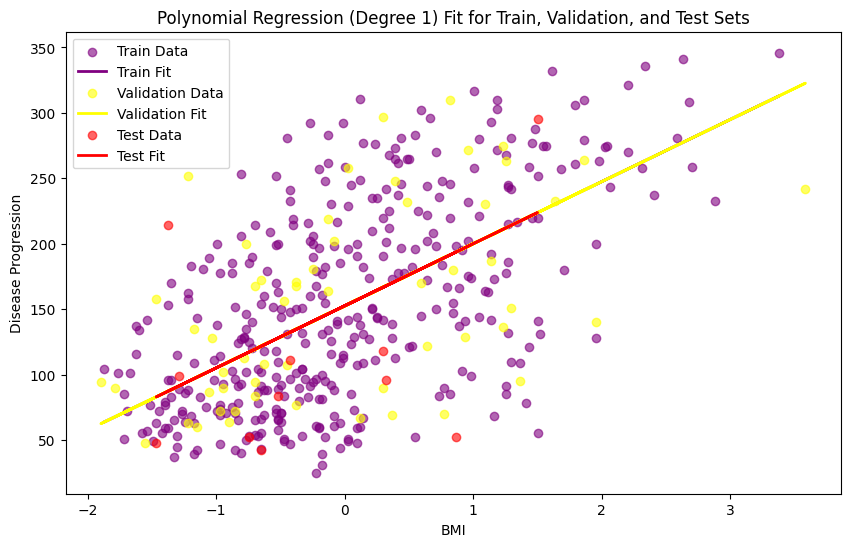

In [129]:
# Generate predictions for train, validation, and test sets
y_train_pred = model.predict(poly.transform(X_bmi_train))
y_val_pred = model.predict(poly.transform(X_bmi_val))
y_test_pred = model.predict(poly.transform(X_bmi_test))
# Create a plot
plt.figure(figsize=(10, 6))

# Plot actual train data
plt.scatter(X_bmi_train, y_train, color='purple', label='Train Data', alpha=0.6)
# Plot model fit for train data
plt.plot(X_bmi_train, y_train_pred, color='purple', label='Train Fit', linewidth=2)

# Plot actual validation data
plt.scatter(X_bmi_val, y_val, color='yellow', label='Validation Data', alpha=0.6)
# Plot model fit for validation data
plt.plot(X_bmi_val, y_val_pred, color='yellow', label='Validation Fit', linewidth=2)

# Plot actual test data
plt.scatter(X_bmi_test, y_test, color='red', label='Test Data', alpha=0.6)
# Plot model fit for test data
plt.plot(X_bmi_test, y_test_pred, color='red', label='Test Fit', linewidth=2)

# Labels and title
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Polynomial Regression (Degree 1) Fit for Train, Validation, and Test Sets')

# Show legend
plt.legend()

# Show plot
plt.show()

### 11. Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient) (1 point).

In [130]:
# from graph, it looks fit the Linear Model and we can get Coefficients
# Get the slope (BMI coefficient)
coef = model.coef_[1]
intercept = model.intercept_  # Get the intercept
# Display the equation with two decimal precision
print(f"The equation of the model is: y = {coef:.2f} * BMI + {intercept:.2f}")


The equation of the model is: y = 47.45 * BMI + 152.56


### 12. Calculate the expected diabetes progression for a BMI value of your choice using `model.perdict()` for that value (0.5 point).

In [131]:
# if I choose bmi = 18.5
bmi_val = 18.5
# Transform the BMI value
bmi_val_poly = poly.transform([[bmi_val]]) 
# Use the trained model to predict the diabetes progression
predicted_progres = model.predict(bmi_val_poly)
# display result
print(f"Expected diabetes progression(bmi = 18.5) is: {predicted_progres[0]:.2f}")


Expected diabetes progression(bmi = 18.5) is: 1030.45


### 13. How many trainable parameters are we fitting for each of the models? Explain these values. One way is to use sklearn function `get_feature_names_out()`(1 point)

In [132]:
# there are two trainable parameters : one coefficient (for the BMI feature) and one intercept
# Using get_feature_names_out() to Verify Trainable Parameters
ft_nms_deg1 = poly.get_feature_names_out(['BMI'])
# Print feature names and number of parameters for degree 1
print("Features for degree 1:", ft_nms_deg1)
print(f"Number of trainable parameters for degree 1: {len(ft_nms_deg1)}")

## for degree 2,3
poly_deg4 = PolynomialFeatures(degree=4)
X_poly_deg_4 = poly_deg4.fit_transform(X_bmi_train)
feature_names_deg_4 = poly_deg4.get_feature_names_out(['BMI'])

print("Features for degree 4:", feature_names_deg_4)
print(f"Number of trainable parameters for degree 4: {len(feature_names_deg_4)}")




Features for degree 1: ['1' 'BMI']
Number of trainable parameters for degree 1: 2
Features for degree 4: ['1' 'BMI' 'BMI^2' 'BMI^3' 'BMI^4']
Number of trainable parameters for degree 4: 5


### 14. Provide a conclusion section. In particular, do a deep dive on where the model fails, and add a short section in the conclusions that describes the model limitations. This should be in addition to summarizing it performance. (1 point).

### Conclusion：
In this report, polynomial regression was used to simulate the relationship between BMI and diabetes progression after baseline. The evaluation tested six degrees from 0 to 5, and degree 1 was found to be the best model. 
1. In R square: medium equivalence, there is a negative number in degree 0 of the model, and there is room for improvement; Mean absolute error (MAE), irregular in data arrangement; Mean Absolute percentage error (MAPE), which indicates that degree 4 is better. The accuracy of the data cannot be determined in the data simulation. 
2. This model only uses BMI as a predictor, and diabetes progression is a complex result. This predictor is too single; In addition, polynomial regression, especially the higher-order model, is very sensitive to outliers, and there will be large errors if extreme values exist. Increasing the model complexity (higher-order polynomials) increases the variance without significantly reducing the bias

## Part 3 (5 points)

### In this part, use all features in the dataset, or drop some features per your discretion based on the EDA.
### Repeat the steps in part 2 for the following models:
### 1. Two polynomial models (degrees >1, of your choice)

In [133]:
# Use all features, get x,y
X_p3 = diabetes_results.data  
y_p3 = diabetes_results.target
# split data
X_train_full, X_test, y_train_full, y_test = train_test_split(X_p3, y_p3, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.10, random_state=42)

In [134]:
# declare function
def train_ploy_models(d,X_train,X_val,y_train):
    polyP3 = PolynomialFeatures(degree=d)
    X_train_polyP3 = polyP3.fit_transform(X_train)
    X_val_polyP3 = polyP3.transform(X_val)

    model_polyP3 = LinearRegression()
    model_polyP3.fit(X_train_polyP3, y_train)
    return model_polyP3,X_val_polyP3, polyP3

In [135]:
## Evaluate the Models on Validation Data
# Polynomial Degree N
def evaluate_models_bValidation(d):
    model_2,X_val_polyP3,polyP3 = train_ploy_models(d,X_train,X_val,y_train)
    y_val_pred_poly2 = model_2.predict(X_val_polyP3)
    r2_poly2 = r2_score(y_val, y_val_pred_poly2)
    mae_poly2 = mean_absolute_error(y_val, y_val_pred_poly2)
    mape_poly2 = np.mean(np.abs((y_val - y_val_pred_poly2) / y_val)) * 100
    return r2_poly2,mae_poly2,mape_poly2


In [136]:
# display results 
r2_poly2,mae_poly2,mape_poly2 = evaluate_models_bValidation(2)
print(f"Degree 2 - R-Squared: {r2_poly2:.4f}, MAE: {mae_poly2:.2f}, MAPE: {mape_poly2:.2f}%")
r2_poly4,mae_poly4,mape_poly4 = evaluate_models_bValidation(4)
print(f"Degree 4 - R-Squared: {r2_poly4:.4f}, MAE: {mae_poly4:.2f}, MAPE: {mape_poly4:.2f}%")

Degree 2 - R-Squared: 0.6014, MAE: 38.05, MAPE: 42.01%
Degree 4 - R-Squared: -34.1837, MAE: 339.79, MAPE: 291.34%


In [137]:
#evaluate on test data
## # Transform the test data
model_2,X4_val_polyP3,polyP32 = train_ploy_models(2,X_train,X_val,y_train)
model_4,X4_val_polyP3,polyP34 = train_ploy_models(4,X_train,X_val,y_train)
X_test_poly2 = polyP32.transform(X_test)
X_test_poly4 = polyP34.transform(X_test)

# Predict and evaluate for degree 2
y_test_pred_poly2 = model_2.predict(X_test_poly2)
r2_test_poly2 = r2_score(y_test, y_test_pred_poly2)
mae_test_poly2 = mean_absolute_error(y_test, y_test_pred_poly2)
mape_test_poly2 = np.mean(np.abs((y_test - y_test_pred_poly2) / y_test)) * 100
print(f"Test - Degree 2: R-Squared: {r2_test_poly2:.4f}, MAE: {mae_test_poly2:.2f}, MAPE: {mape_test_poly2:.2f}%")

y_test_pred_poly4 = model_4.predict(X_test_poly4)
r2_test_poly4 = r2_score(y_test, y_test_pred_poly4)
mae_test_poly4 = mean_absolute_error(y_test, y_test_pred_poly4)
mape_test_poly4 = np.mean(np.abs((y_test - y_test_pred_poly4) / y_test)) * 100

print(f"Test - Degree 4: R-Squared: {r2_test_poly4:.4f}, MAE: {mae_test_poly4:.2f}, MAPE: {mape_test_poly4:.2f}%")

Test - Degree 2: R-Squared: 0.3610, MAE: 44.99, MAPE: 38.62%
Test - Degree 4: R-Squared: -27.6248, MAE: 261.93, MAPE: 231.17%


### 2. Two decision trees (e.g. consider changing the `max_depth` hyperparameter)

In [138]:
## Import Libraries
from sklearn.tree import DecisionTreeRegressor
# Train Two Decision Tree Models with Different max_depth
# Decision Tree with max_depth = 3
tree_model_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model_3.fit(X_train, y_train)

# Decision Tree with max_depth = 5
tree_model_5 = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model_5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [139]:
## Evaluate the Models on Validation Data
## predict the validation set values and calculate the performance metrics: R-Squared, Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE) for each model.
# Decision Tree with max_depth = 3
y_val_pred_tree_3 = tree_model_3.predict(X_val)
r2_tree_3 = r2_score(y_val, y_val_pred_tree_3)
mae_tree_3 = mean_absolute_error(y_val, y_val_pred_tree_3)
mape_tree_3 = np.mean(np.abs((y_val - y_val_pred_tree_3) / y_val)) * 100

print(f"Decision Tree (max_depth=3) - R-Squared: {r2_tree_3:.4f}, MAE: {mae_tree_3:.2f}, MAPE: {mape_tree_3:.2f}%")

# Decision Tree with max_depth = 5
y_val_pred_tree_5 = tree_model_5.predict(X_val)
r2_tree_5 = r2_score(y_val, y_val_pred_tree_5)
mae_tree_5 = mean_absolute_error(y_val, y_val_pred_tree_5)
mape_tree_5 = np.mean(np.abs((y_val - y_val_pred_tree_5) / y_val)) * 100

print(f"Decision Tree (max_depth=5) - R-Squared: {r2_tree_5:.4f}, MAE: {mae_tree_5:.2f}, MAPE: {mape_tree_5:.2f}%")



Decision Tree (max_depth=3) - R-Squared: 0.4055, MAE: 45.36, MAPE: 42.39%
Decision Tree (max_depth=5) - R-Squared: 0.1351, MAE: 52.68, MAPE: 48.20%


In [140]:
## Evaluate the Models on the Test Set
# Decision Tree with max_depth = 3 on test data
y_test_pred_tree_3 = tree_model_3.predict(X_test)
r2_test_tree_3 = r2_score(y_test, y_test_pred_tree_3)
mae_test_tree_3 = mean_absolute_error(y_test, y_test_pred_tree_3)
mape_test_tree_3 = np.mean(np.abs((y_test - y_test_pred_tree_3) / y_test)) * 100

print(f"Test - Decision Tree (max_depth=3): R-Squared: {r2_test_tree_3:.4f}, MAE: {mae_test_tree_3:.2f}, MAPE: {mape_test_tree_3:.2f}%")

# Decision Tree with max_depth = 5 on test data
y_test_pred_tree_5 = tree_model_5.predict(X_test)
r2_test_tree_5 = r2_score(y_test, y_test_pred_tree_5)
mae_test_tree_5 = mean_absolute_error(y_test, y_test_pred_tree_5)
mape_test_tree_5 = np.mean(np.abs((y_test - y_test_pred_tree_5) / y_test)) * 100

print(f"Test - Decision Tree (max_depth=5): R-Squared: {r2_test_tree_5:.4f}, MAE: {mae_test_tree_5:.2f}, MAPE: {mape_test_tree_5:.2f}%")


Test - Decision Tree (max_depth=3): R-Squared: 0.3952, MAE: 46.20, MAPE: 41.67%
Test - Decision Tree (max_depth=5): R-Squared: 0.1173, MAE: 54.32, MAPE: 44.94%


### It indicates that max depth 5 is better than max depth=3, as it has the lower MAE and MAPE.

### 3. Two kNNs

In [141]:
## Import Libraries
from sklearn.neighbors import KNeighborsRegressor

In [142]:
## Train Two kNN Models with Different Values for n_neighbors
# kNN with n_neighbors = 3
knn_model_3 = KNeighborsRegressor(n_neighbors=3)
knn_model_3.fit(X_train, y_train)

# kNN with n_neighbors = 5
knn_model_5 = KNeighborsRegressor(n_neighbors=5)
knn_model_5.fit(X_train, y_train)

KNeighborsRegressor()

In [143]:
## Evaluate the Models on Validation Data
# kNN with n_neighbors = 3
y_val_pred_knn_3 = knn_model_3.predict(X_val)
r2_knn_3 = r2_score(y_val, y_val_pred_knn_3)
mae_knn_3 = mean_absolute_error(y_val, y_val_pred_knn_3)
mape_knn_3 = np.mean(np.abs((y_val - y_val_pred_knn_3) / y_val)) * 100

print(f"kNN (n_neighbors=3) - R-Squared: {r2_knn_3:.4f}, MAE: {mae_knn_3:.2f}, MAPE: {mape_knn_3:.2f}%")

# kNN with n_neighbors = 5
y_val_pred_knn_5 = knn_model_5.predict(X_val)
r2_knn_5 = r2_score(y_val, y_val_pred_knn_5)
mae_knn_5 = mean_absolute_error(y_val, y_val_pred_knn_5)
mape_knn_5 = np.mean(np.abs((y_val - y_val_pred_knn_5) / y_val)) * 100

print(f"kNN (n_neighbors=5) - R-Squared: {r2_knn_5:.4f}, MAE: {mae_knn_5:.2f}, MAPE: {mape_knn_5:.2f}%")


kNN (n_neighbors=3) - R-Squared: 0.3594, MAE: 51.80, MAPE: 50.37%
kNN (n_neighbors=5) - R-Squared: 0.4697, MAE: 46.15, MAPE: 44.84%


In [144]:
## Evaluate the Models on the Test Set
# kNN with n_neighbors = 3 on test data
y_test_pred_knn_3 = knn_model_3.predict(X_test)
r2_test_knn_3 = r2_score(y_test, y_test_pred_knn_3)
mae_test_knn_3 = mean_absolute_error(y_test, y_test_pred_knn_3)
mape_test_knn_3 = np.mean(np.abs((y_test - y_test_pred_knn_3) / y_test)) * 100

print(f"Test - kNN (n_neighbors=3): R-Squared: {r2_test_knn_3:.4f}, MAE: {mae_test_knn_3:.2f}, MAPE: {mape_test_knn_3:.2f}%")

# kNN with n_neighbors = 5 on test data
y_test_pred_knn_5 = knn_model_5.predict(X_test)
r2_test_knn_5 = r2_score(y_test, y_test_pred_knn_5)
mae_test_knn_5 = mean_absolute_error(y_test, y_test_pred_knn_5)
mape_test_knn_5 = np.mean(np.abs((y_test - y_test_pred_knn_5) / y_test)) * 100

print(f"Test - kNN (n_neighbors=5): R-Squared: {r2_test_knn_5:.4f}, MAE: {mae_test_knn_5:.2f}, MAPE: {mape_test_knn_5:.2f}%")


Test - kNN (n_neighbors=3): R-Squared: 0.3229, MAE: 47.79, MAPE: 39.17%
Test - kNN (n_neighbors=5): R-Squared: 0.4494, MAE: 42.60, MAPE: 35.43%


It can be seen clearly that kNN (n_neighbors=5) works better than model with 3 neighbors, as it has lower MAE and MAPE.